# Imports

In [1]:
from stl import mesh
import numpy as np

from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Convert STL to Mesh

In [2]:
src = 'stl/T1.1.stl'
mesh_obj = mesh.Mesh.from_file(src)

In [3]:
mesh_obj.normals, mesh_obj.normals.shape

(array([[ 0.00281052, -0.00437338,  0.00060766],
        [ 0.00228421, -0.00354392,  0.0004876 ],
        [ 0.00399605, -0.00641397,  0.00093624],
        ...,
        [ 0.00232249, -0.00370769,  0.0005188 ],
        [ 0.00261827, -0.00410013,  0.00054868],
        [ 0.00304271, -0.00472576,  0.00065705]], dtype=float32),
 (105160, 3))

In [4]:
mesh_obj.v0, mesh_obj.v1, mesh_obj.v2 

(array([[2.6487157, 1.0674362, 6.676467 ],
        [2.6487157, 1.0674362, 6.676467 ],
        [2.6420212, 1.0756333, 6.766425 ],
        ...,
        [2.7064564, 1.104692 , 6.6767535],
        [2.6487157, 1.0674362, 6.676467 ],
        [2.6487157, 1.0674362, 6.676467 ]], dtype=float32),
 array([[2.6927476, 1.1042913, 6.738062 ],
        [2.7064564, 1.104692 , 6.6767535],
        [2.71453  , 1.1287341, 6.820726 ],
        ...,
        [2.7557824, 1.1319597, 6.6508107],
        [2.5919068, 1.0388484, 6.733927 ],
        [2.6420212, 1.0756333, 6.766425 ]], dtype=float32),
 array([[2.6420212, 1.0756333, 6.766425 ],
        [2.6927476, 1.1042913, 6.738062 ],
        [2.633197 , 1.0820831, 6.8482747],
        ...,
        [2.7453053, 1.1366856, 6.731488 ],
        [2.59399  , 1.0302384, 6.6596456],
        [2.5919068, 1.0388484, 6.733927 ]], dtype=float32))

In [5]:
mesh_obj.v0.shape, mesh_obj.v1.shape, mesh_obj.v2.shape 

((105160, 3), (105160, 3), (105160, 3))

# Plot Object from Mesh Data

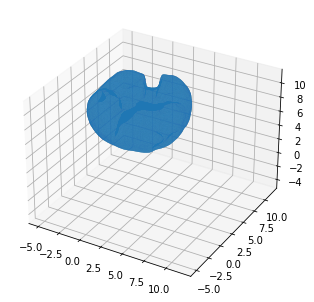

In [6]:
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

axes.add_collection3d(mplot3d.art3d.Poly3DCollection(mesh_obj.vectors))

# Auto scale to the mesh size
scale = mesh_obj.points.flatten('F')
axes.auto_scale_xyz(scale, scale, scale)

pyplot.show()

# Create Numpy Array from Mesh

###### Original Shape

In [7]:
data = np.array(mesh_obj)
data[0]

array([2.6487157, 1.0674362, 6.676467 , 2.6927476, 1.1042913, 6.738062 ,
       2.6420212, 1.0756333, 6.766425 ], dtype=float32)

In [8]:
data.shape

(105160, 9)

###### Custom MultiDim Shape

In [10]:
n = data.shape[0]

data = np.reshape(data, (n, 3, 3))

In [11]:
data.shape

(105160, 3, 3)

# Properties from Mesh Object

In [12]:
volume, cog, inertia = mesh_obj.get_mass_properties()
print("Volume                                  = {0}".format(volume))
print("Position of the center of gravity (COG) = {0}".format(cog))
print("Inertia matrix at expressed at the COG  = {0}".format(inertia[0,:]))
print("                                          {0}".format(inertia[1,:]))
print("                                          {0}".format(inertia[2,:]))

Your mesh is not closed, the mass methods will not function
            correctly on this mesh.  For more info:
            https://github.com/WoLpH/numpy-stl/issues/69


Volume                                  = 363.1188106602588
Position of the center of gravity (COG) = [-0.05476512  5.77020693  5.60582276]
Inertia matrix at expressed at the COG  = [3289.43402781 -181.68337896  124.43737926]
                                          [-181.68337896 3058.82201916 -109.3904177 ]
                                          [ 124.43737926 -109.3904177  4789.65156307]


# Plot sample files from Stltovoxel lib

In [13]:
moon_mesh = mesh.Mesh.from_file('stl/Moon.stl')
pyramid_mesh = mesh.Mesh.from_file('stl/Pyramid.stl')
star_mesh = mesh.Mesh.from_file('stl/Star.stl')
# donut_mesh = mesh.Mesh.from_file('stl/HalfDonut.stl')

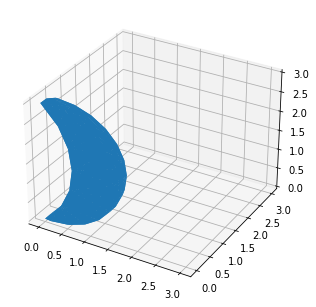

In [14]:
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot

your_mesh = moon_mesh
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

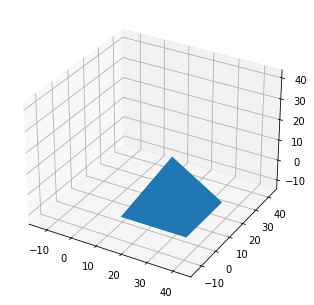

In [15]:
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot

your_mesh = pyramid_mesh
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

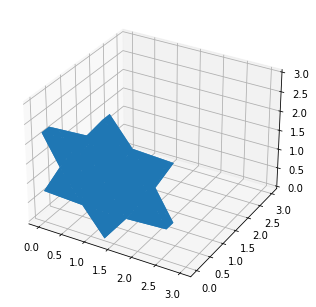

In [16]:
# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)

# Load the STL files and add the vectors to the plot

your_mesh = star_mesh
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten('F')
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [17]:
moon_mesh.normals.shape, pyramid_mesh.normals.shape, star_mesh.normals.shape

((116, 3), (6, 3), (68, 3))

##### Note: Looks like the shape of the STL file varies. The mesh will result in n number of 'layers (there is a technical term for this)', and for creating dataloaders in Machine learning, we need n to be same for all STL files 